# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
df = pd.read_csv('kc_house_data_train.csv', index_col=0)

In [4]:
pd.set_option('display.max_columns', None)

In [8]:
df.head(10)

id             date      price  bedrooms  bathrooms  sqft_living  \
0  2591820310  20141006T000000   365000.0         4       2.25         2070   
1  7974200820  20140821T000000   865000.0         5       3.00         2900   
2  7701450110  20140815T000000  1038000.0         4       2.50         3770   
3  9522300010  20150331T000000  1490000.0         3       3.50         4560   
4  9510861140  20140714T000000   711000.0         3       2.50         2550   
5  1761300310  20140827T000000   211000.0         4       2.00         1710   
6  7732410120  20140819T000000   790000.0         4       2.50         2690   
7  7010701383  20141017T000000   680000.0         3       2.50         1800   
8   291310170  20140804T000000   384500.0         3       2.50         1600   
9  4232901990  20140516T000000   605000.0         2       1.00          910   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      8893     2.0           0     0          4      8        2070   
1      6730     1.0           0     0          5      8        1830   
2     10893     2.0           0     2          3     11        3770   
3     14608     2.0           0     2          3     12        4560   
4      5376     2.0           0     0          3      9        2550   
5      8288     1.5           0     0          3      7        1710   
6      8036     2.0           0     0          4      9        2690   
7      4400     1.0           0     0          5      7        1350   
8      2610     2.0           0     0          3      8        1600   
9      3600     1.0           0     0          4      7         910   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1986             0    98058  47.4388 -122.162   
1           1070      1977             0    98115  47.6784 -122.285   
2              0      1997             0    98006  47.5646 -122.129   
3              0      1990             0    98034  47.6995 -122.228   
4              0      2004             0    98052  47.6647 -122.083   
5              0      1970             0    98031  47.3947 -122.174   
6              0      1987             0    98007  47.6596 -122.144   
7            450      1970             0    98199  47.6599 -122.396   
8              0      2005             0    98027  47.5344 -122.068   
9              0      1909             0    98119  47.6341 -122.361   

   sqft_living15  sqft_lot15  
0           2390        7700  
1           2370        6283  
2           3710        9685  
3           4050       14226  
4           2250        4050  
5           1710        7200  
6           2420        8087  
7           1920        4400  
8           1445        1288  
9           1720        3600

In [13]:
df.tail(10)

id             date      price  bedrooms  bathrooms  \
17280  2568300040  20140819T000000   709050.0         4       3.50   
17281  1251200045  20140620T000000  1462500.0         5       3.25   
17282  7625704510  20141022T000000   850000.0         4       3.25   
17283  1233100366  20141215T000000   500000.0         3       1.50   
17284  2078500350  20140604T000000   560000.0         3       2.50   
17285   627300195  20150303T000000   750000.0         5       2.50   
17286  8819900270  20140520T000000   440000.0         2       1.75   
17287  3816300095  20140514T000000   310000.0         3       1.00   
17288   122069107  20141204T000000   427500.0         3       1.50   
17289  6703100135  20150116T000000   348000.0         3       1.50   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
17280         2720      9000     2.0           0     0          3      8   
17281         3840      4800     3.0           0     3          3     10   
17282         3450      6500     2.0           0     0          3      8   
17283         1680     17409     1.0           0     0          3      7   
17284         2070     12708     2.0           0     0          3      8   
17285         3240      9960     1.0           0     1          3      8   
17286         1300      4000     2.0           0     0          3      7   
17287         1050      9876     1.0           0     0          3      7   
17288         1900     43186     1.5           0     0          4      7   
17289         1330      6768     1.0           0     0          4      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
17280        2670             50      1997             0    98125  47.7034   
17281        2750           1090      2008             0    98144  47.5929   
17282        2450           1000      1994             0    98136  47.5437   
17283        1680              0      1962             0    98033  47.6766   
17284        2070              0      1996             0    98056  47.5295   
17285        2020           1220      1958             0    98008  47.5858   
17286        1300              0      1948             0    98105  47.6687   
17287        1050              0      1953             0    98028  47.7635   
17288        1300            600      1971             0    98038  47.4199   
17289        1330              0      1952             0    98155  47.7366   

          long  sqft_living15  sqft_lot15  
17280 -122.297           1960        7772  
17281 -122.290           2060        4800  
17282 -122.388           1750        6500  
17283 -122.176           1680        9101  
17284 -122.180           2620        9617  
17285 -122.112           2730       10400  
17286 -122.288           1350        4013  
17287 -122.262           1760        9403  
17288 -121.990           2080      108028  
17289 -122.319           1320        6910

In [6]:
df.shape

(17290, 22)

In [10]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  1.729000e+04  1.729000e+04  17290.000000  17290.000000  17290.000000   
mean   4.565502e+09  5.407395e+05      3.372470      2.111943   2081.464604   
std    2.874656e+09  3.733190e+05      0.939346      0.770476    920.018539   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.114701e+09  3.210000e+05      3.000000      1.500000   1430.000000   
50%    3.903650e+09  4.500000e+05      3.000000      2.250000   1920.000000   
75%    7.301150e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.729000e+04  17290.000000  17290.000000  17290.000000  17290.000000   
mean   1.524340e+04      1.490312      0.007981      0.238519      3.408502   
std    4.230462e+04      0.538909      0.088985      0.775229      0.651296   
min    5.720000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.081250e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.642000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.072575e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  17290.000000  17290.000000   17290.000000  17290.000000  17290.000000   
mean       7.654425   1789.306015     292.158589   1970.792019     83.806304   
std        1.174718    829.265107     443.151874     29.343516    400.329376   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1200.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1974.000000      0.000000   
75%        8.000000   2214.500000     560.000000   1996.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  17290.000000  17290.000000  17290.000000   17290.000000   17290.000000  
mean   98078.193175     47.560058   -122.214258    1987.986698   12873.475824  
std       53.607949      0.138412      0.140857     684.802635   27227.437583  
min    98001.000000     47.155900   -122.519000     399.000000     659.000000  
25%    98033.000000     47.471200   -122.329000    1490.000000    5111.250000  
50%    98065.000000     47.571600   -122.230000    1840.000000    7622.500000  
75%    98118.000000     47.677900   -122.126000    2360.000000   10101.750000  
max    98199.000000     47.777600   -121.315000    6210.000000  858132.000000

In [11]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
type(df['date'][0])

str

In [16]:
df['date_formatted'] = pd.to_datetime(df['date'])

In [17]:
df['date_formatted']

0       2014-10-06
1       2014-08-21
2       2014-08-15
3       2015-03-31
4       2014-07-14
           ...    
17285   2015-03-03
17286   2014-05-20
17287   2014-05-14
17288   2014-12-04
17289   2015-01-16
Name: date_formatted, Length: 17290, dtype: datetime64[ns]

In [18]:
df.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.015644 -0.001529   0.003833    -0.014251 -0.129837   
price         -0.015644  1.000000  0.305106   0.524335     0.703540  0.086803   
bedrooms      -0.001529  0.305106  1.000000   0.507867     0.570428  0.029375   
bathrooms      0.003833  0.524335  0.507867   1.000000     0.755270  0.085470   
sqft_living   -0.014251  0.703540  0.570428   0.755270     1.000000  0.166810   
sqft_lot      -0.129837  0.086803  0.029375   0.085470     0.166810  1.000000   
floors         0.017126  0.256985  0.172975   0.497967     0.357169 -0.002205   
waterfront     0.000101  0.275779 -0.008581   0.065848     0.109738  0.015356   
view           0.012594  0.395485  0.079741   0.188817     0.283336  0.073058   
condition     -0.014272  0.036099  0.025266  -0.122976    -0.061530 -0.013715   
grade          0.003163  0.666215  0.354679   0.664191     0.762929  0.110320   
sqft_above    -0.013932  0.607760  0.472492   0.686853     0.876696  0.180755   
sqft_basement -0.003516  0.323312  0.300085   0.282700     0.435529  0.008065   
yr_built       0.013697  0.056450  0.153769   0.507761     0.319397  0.054228   
yr_renovated  -0.019560  0.117770  0.013679   0.048140     0.051448  0.004520   
zipcode       -0.008166 -0.048958 -0.147515  -0.201527    -0.195893 -0.126590   
lat           -0.001865  0.302394 -0.002170   0.023074     0.052646 -0.082029   
long           0.017388  0.019327  0.124279   0.221308     0.234453  0.226190   
sqft_living15 -0.007494  0.585567  0.387589   0.568080     0.755066  0.136959   
sqft_lot15    -0.139605  0.081423  0.026665   0.086499     0.179570  0.701875   

                 floors  waterfront      view  condition     grade  \
id             0.017126    0.000101  0.012594  -0.014272  0.003163   
price          0.256985    0.275779  0.395485   0.036099  0.666215   
bedrooms       0.172975   -0.008581  0.079741   0.025266  0.354679   
bathrooms      0.497967    0.065848  0.188817  -0.122976  0.664191   
sqft_living    0.357169    0.109738  0.283336  -0.061530  0.762929   
sqft_lot      -0.002205    0.015356  0.073058  -0.013715  0.110320   
floors         1.000000    0.025132  0.025883  -0.259230  0.458984   
waterfront     0.025132    1.000000  0.407565   0.009608  0.092234   
view           0.025883    0.407565  1.000000   0.045060  0.249554   
condition     -0.259230    0.009608  0.045060   1.000000 -0.142066   
grade          0.458984    0.092234  0.249554  -0.142066  1.000000   
sqft_above     0.528509    0.077162  0.164747  -0.157466  0.758247   
sqft_basement -0.247481    0.083433  0.279939   0.166923  0.165003   
yr_built       0.483657   -0.021981 -0.049593  -0.358921  0.448003   
yr_renovated   0.005985    0.094268  0.091291  -0.060969  0.007988   
zipcode       -0.060560    0.034282  0.089475   0.007068 -0.184946   
lat            0.048227   -0.013331  0.003820  -0.009927  0.116196   
long           0.128795   -0.042728 -0.077572  -0.109200  0.198369   
sqft_living15  0.283933    0.091090  0.279999  -0.094307  0.715745   
sqft_lot15    -0.008170    0.026895  0.073185  -0.007125  0.116062   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.013932      -0.003516  0.013697     -0.019560 -0.008166   
price            0.607760       0.323312  0.056450      0.117770 -0.048958   
bedrooms         0.472492       0.300085  0.153769      0.013679 -0.147515   
bathrooms        0.686853       0.282700  0.507761      0.048140 -0.201527   
sqft_living      0.876696       0.435529  0.319397      0.051448 -0.195893   
sqft_lot         0.180755       0.008065  0.054228      0.004520 -0.126590   
floors           0.528509      -0.247481  0.483657      0.005985 -0.060560   
waterfront       0.077162       0.083433 -0.021981      0.094268  0.034282   
view             0.164747       0.279939 -0.049593      0.091291  0.089475   
condition       -0.157466       0.166923 -0.358921     -0.060969  0.

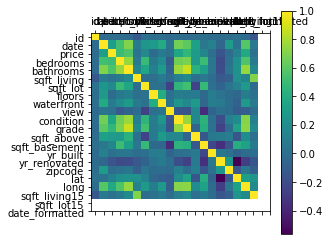

In [20]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

In [23]:
import seaborn as sns

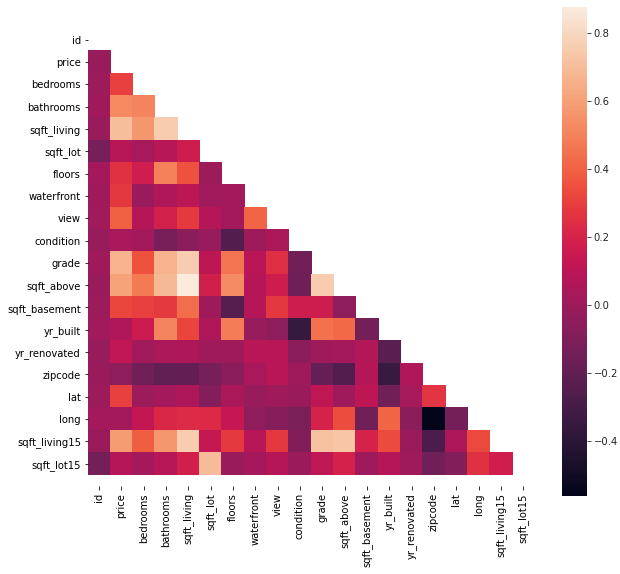

In [24]:
f, ax = plt.subplots(figsize = (10,9))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    ax = sns.heatmap(df.corr(), mask = mask, square = True)
b, t = plt.ylim()
b += .5
t -= .5
plt.ylim(b,t)
plt.show()

In [25]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date_formatted'],
      dtype='object')

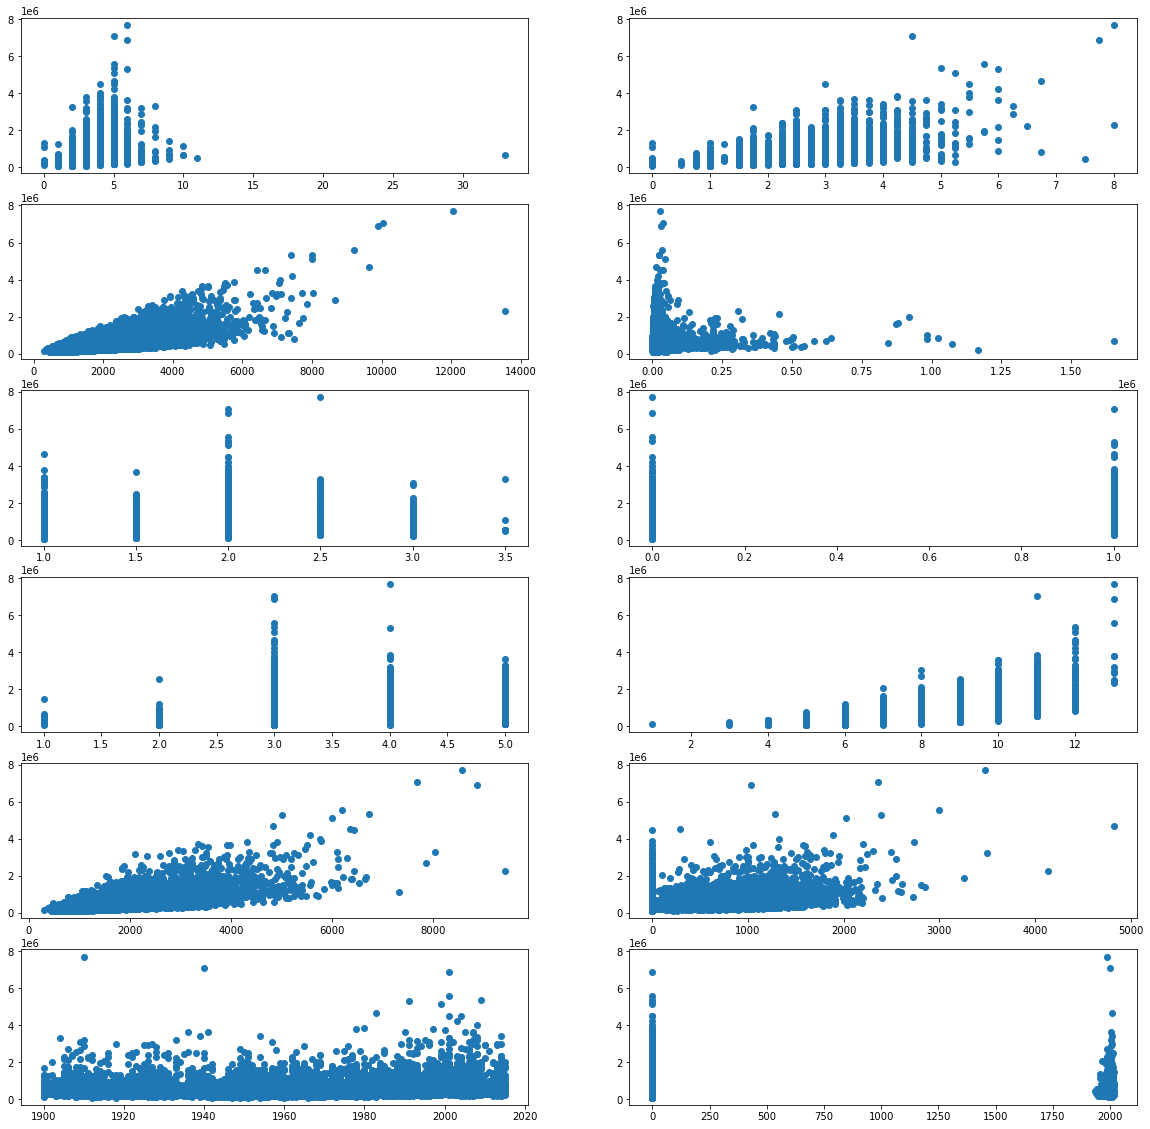

In [35]:
fig, ax = plt.subplots(6, 2, figsize = (20,20))
ax[0][0].scatter(df['bedrooms'], df['price'])
ax[0][1].scatter(df['bathrooms'], df['price'])
ax[1][0].scatter(df['sqft_living'], df['price'])
ax[1][1].scatter(df['sqft_lot'], df['price'])
ax[2][0].scatter(df['floors'], df['price'])
ax[2][1].scatter(df['waterfront'], df['price'])
ax[3][0].scatter(df['condition'], df['price'])
ax[3][1].scatter(df['grade'], df['price'])
ax[4][0].scatter(df['sqft_above'], df['price'])
ax[4][1].scatter(df['sqft_basement'], df['price'])
ax[5][0].scatter(df['yr_built'], df['price'])
ax[5][1].scatter(df['yr_renovated'], df['price'])

<BarContainer object of 70 artists>

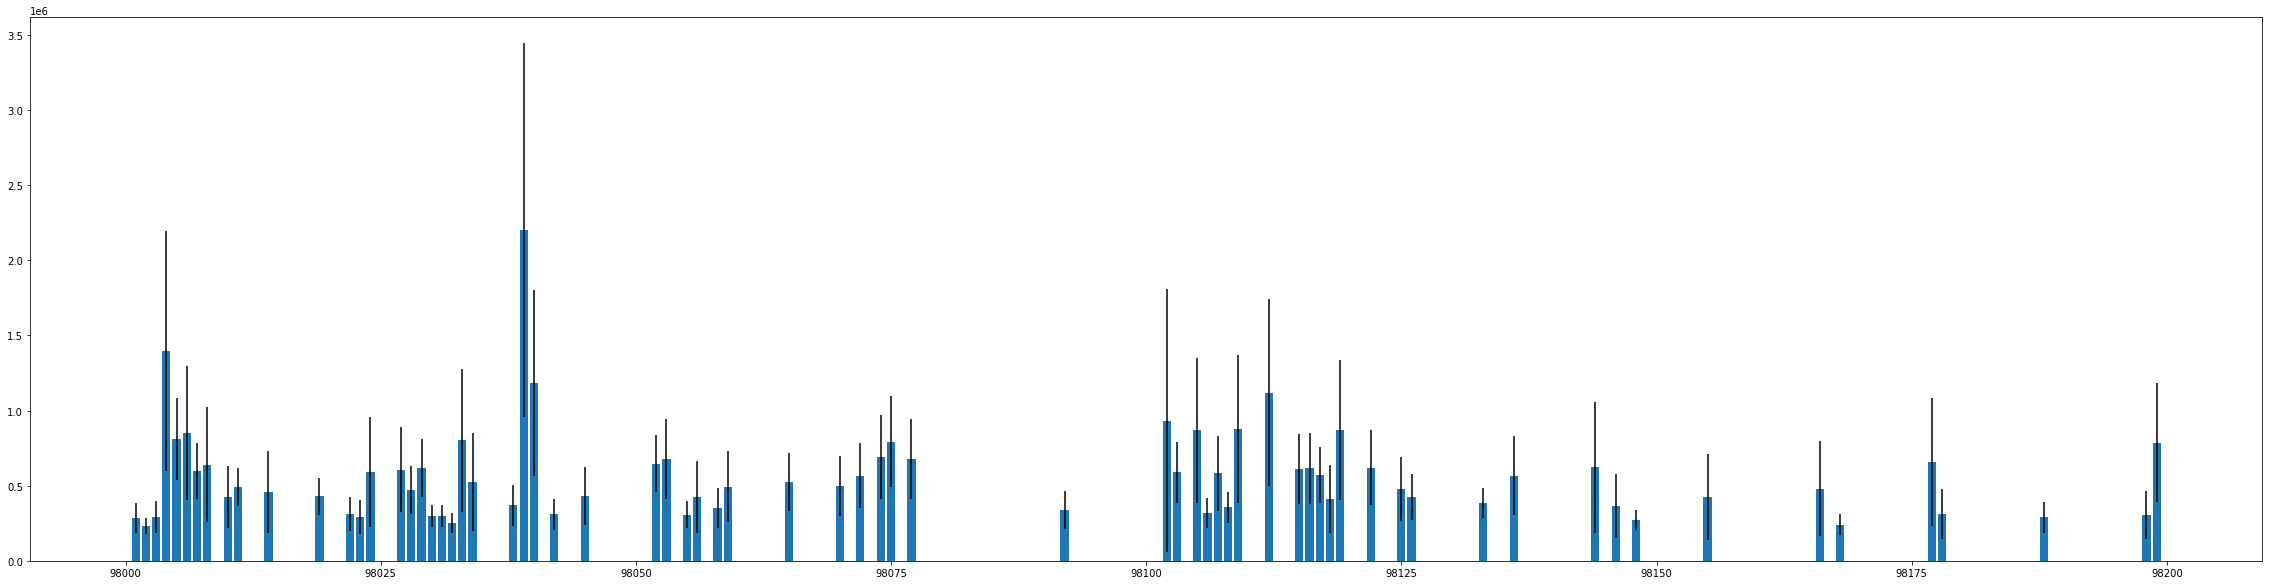

In [92]:
fig, ax = plt.subplots(figsize = (40, 10))
ax.bar(df.groupby('zipcode')['price'].mean().index, df.groupby('zipcode')['price'].mean(), yerr = df.groupby('zipcode')['price'].std())

<ipython-input-100-13e0fbef4b74>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.groupby('zipcode')['price'].mean().index[:10], rotation = 45)


[Text(98000.0, 0, '98001'),
 Text(98002.0, 0, '98002'),
 Text(98004.0, 0, '98003'),
 Text(98006.0, 0, '98004'),
 Text(98008.0, 0, '98005'),
 Text(98010.0, 0, '98006'),
 Text(98012.0, 0, '98007')]

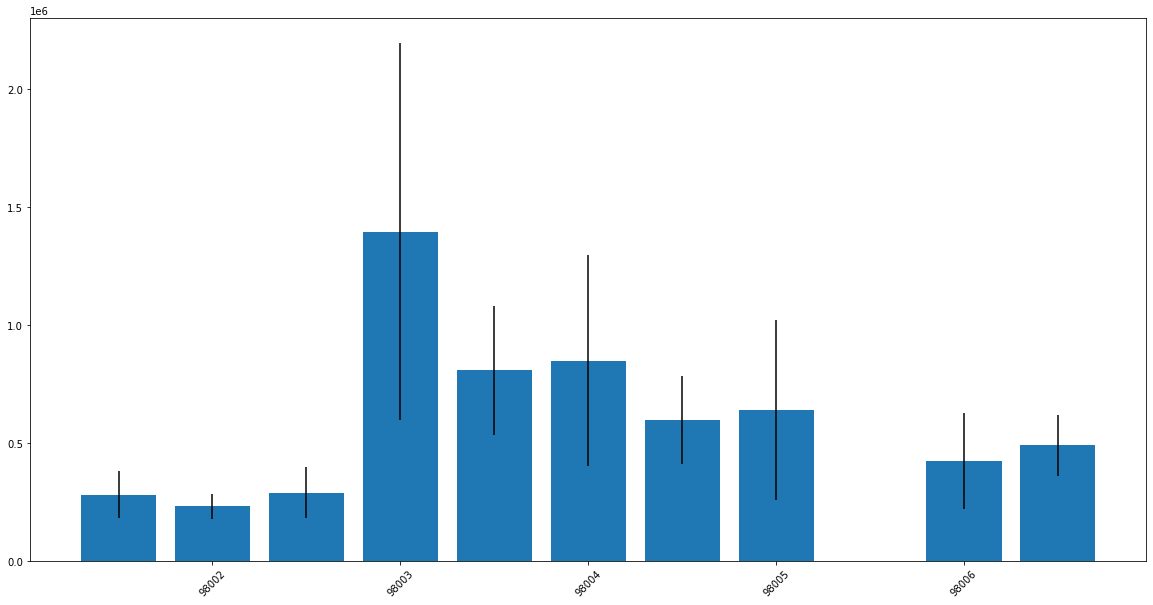

In [100]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.bar(df.groupby('zipcode')['price'].mean().index[:10], df.groupby('zipcode')['price'].mean()[:10], yerr = df.groupby('zipcode')['price'].std()[:10])
ax.set_xticklabels(df.groupby('zipcode')['price'].mean().index[:10], rotation = 45)

In [104]:
df.groupby('zipcode')['price'].mean().index[:10]

Int64Index([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
            98011],
           dtype='int64', name='zipcode')

In [103]:
df.groupby('zipcode')['price'].mean()[:10]

zipcode
98001    2.819988e+05
98002    2.322865e+05
98003    2.907627e+05
98004    1.396883e+06
98005    8.088476e+05
98006    8.494588e+05
98007    5.975536e+05
98008    6.407492e+05
98010    4.248736e+05
98011    4.906393e+05
Name: price, dtype: float64

In [108]:
print(df.groupby('zipcode')['price'].mean().min())
print(df.groupby('zipcode')['price'].mean().max())

232286.52866242037
2202790.0


In [105]:
df.groupby('zipcode')['price'].std()[:10]

zipcode
98001     99401.111630
98002     53328.749140
98003    107220.215114
98004    798005.277142
98005    272741.690225
98006    447420.115637
98007    186267.010018
98008    383281.250801
98010    204060.551346
98011    128099.507940
Name: price, dtype: float64

In [52]:
df['zipcode'].value_counts()

98052    474
98115    465
98103    461
98038    455
98117    437
        ... 
98102     80
98010     74
98024     65
98148     43
98039     42
Name: zipcode, Length: 70, dtype: int64

<BarContainer object of 2 artists>

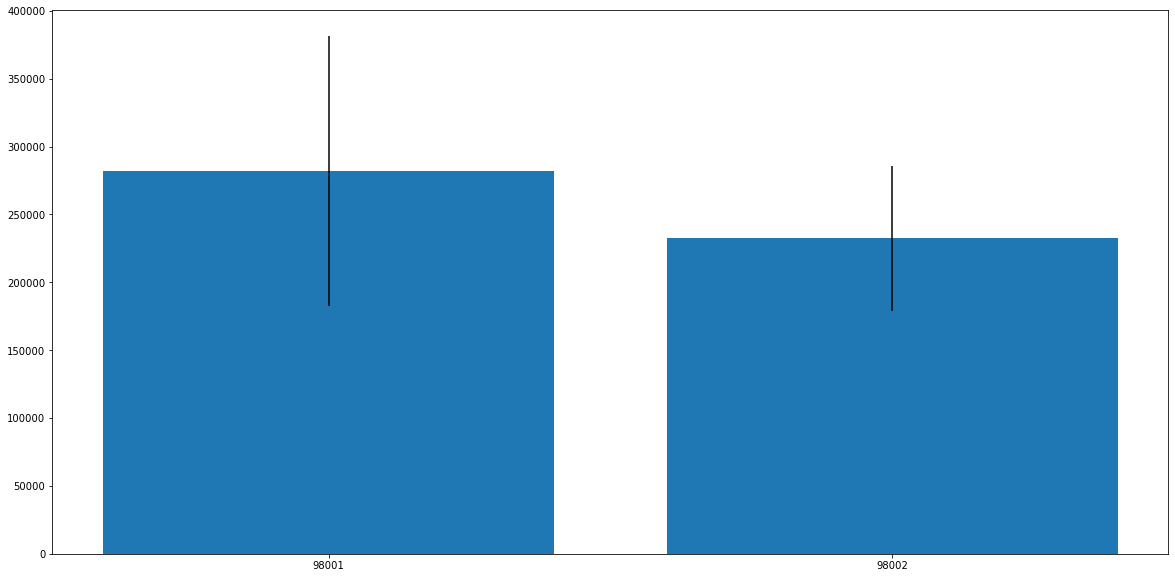

In [53]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.bar(['98001', '98002'], [df[df['zipcode'] == 98001]['price'].mean(), df[df['zipcode'] == 98002]['price'].mean()], yerr = [df[df['zipcode'] == 98001]['price'].std(), df[df['zipcode'] == 98002]['price'].std()])

In [36]:
df[df['bedrooms'] > 7]

id             date      price  bedrooms  bathrooms  \
1015   1652500060  20140711T000000  1650000.0         8       2.75   
2356   1773100755  20140821T000000   520000.0        11       3.00   
2991   8813400155  20141219T000000   808000.0         8       3.75   
3425    424049043  20140811T000000   450000.0         9       7.50   
3680   8812401450  20141229T000000   660000.0        10       3.00   
3757   1346300150  20141020T000000  3300000.0         8       4.00   
4127   3756900027  20141125T000000   575000.0         8       3.00   
8207   8823900290  20150317T000000  1400000.0         9       4.00   
8419    685000115  20141007T000000  2150000.0         8       6.00   
8446   8823901445  20150313T000000   934000.0         9       3.00   
8597   2402100895  20140625T000000   640000.0        33       1.75   
8624   1997200215  20140507T000000   599999.0         9       4.50   
9013   1873400020  20140703T000000   340000.0         8       2.75   
9434   2769600590  20141016T000000   900000.0         8       4.00   
10606  9126101740  20141204T000000   490000.0         8       5.00   
10700  1338600225  20140528T000000  1970000.0         8       3.50   
11181   627300145  20140814T000000  1148000.0        10       5.25   
14137  7226500100  20150219T000000   373000.0         8       3.00   
14156  2902200015  20150106T000000   700000.0         9       3.00   
17114  5566100170  20141029T000000   650000.0        10       2.00   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
1015          4040     20666     1.0           0     0          4      9   
2356          3000      4960     2.0           0     0          3      7   
2991          3460      4600     2.0           0     0          3      7   
3425          4050      6504     2.0           0     0          3      7   
3680          2920      3745     2.0           0     0          4      7   
3757          7710     11750     3.5           0     0          5     12   
4127          3840     15990     1.0           0     0          3      7   
8207          4620      5508     2.5           0     0          3     11   
8419          4340      9415     2.0           0     0          3      8   
8446          2820      4480     2.0           0     0          3      7   
8597          1620      6000     1.0           0     0          5      7   
8624          3830      6988     2.5           0     0          3      7   
9013          2790      6695     1.0           0     0          3      7   
9434          4020      7500     1.0           0     0          3      8   
10606         2800      2580     2.0           0     0          3      8   
10700         4440      6480     2.0           0     3          5     10   
11181         4590     10920     1.0           0     2          3      9   
14137         2850     12714     1.0           0     0          3      7   
14156         3680      4400     2.0           0     0          3      7   
17114         3610     11914     2.0           0     0          4      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
1015         2020           2020      1962             0    98004  47.6340   
2356         2400            600      1918          1999    98106  47.5560   
2991         2860            600      1987             0    98105  47.6617   
3425         4050              0      1996             0    98144  47.5923   
3680         1860           1060      1913             0    98105  47.6635   
3757         6090           1620      1904             0    98112  47.6263   
4127         2530           1310      1961             0    98034  47.7111   
8207         3870            750      1915             0    98105  47.6684   
8419         4340              0      1967             0    98004  47.6316   
8446         1880            940      1918             0    98105  47.6654   
8597         1040            580      1947             0    98103  47.6878   
8624       

In [37]:
df['bedrooms'].value_counts()

3     7864
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [38]:
df['bedrooms_clean'] = df['bedrooms']

In [40]:
df[df['bedrooms_clean'] == 33]

id             date     price  bedrooms  bathrooms  sqft_living  \
8597  2402100895  20140625T000000  640000.0        33       1.75         1620   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
8597      6000     1.0           0     0          5      7        1040   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
8597            580      1947             0    98103  47.6878 -122.331   

      sqft_living15  sqft_lot15 date_formatted  bedrooms_clean  
8597           1330        4700     2014-06-25              33

In [43]:
df['bedrooms_clean'] = df['bedrooms_clean'].replace({33:3})

In [44]:
df['bedrooms_clean'].value_counts()

3     7865
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
Name: bedrooms_clean, dtype: int64

In [54]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date_formatted',
       'bedrooms_clean'],
      dtype='object')

In [63]:
# price dependent on bedrooms_clean+bathrooms+sqft_living+grade
from statsmodels.formula.api import ols
lr_model = ols(formula = 'price~bedrooms_clean+bathrooms+sqft_living+grade', data = df).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     5179.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:53:33   Log-Likelihood:            -2.3956e+05
No. Observations:               17290   AIC:                         4.791e+05
Df Residuals:                   17285   BIC:                         4.792e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4.728e+05    1.7e+04    -27.814      0.000   -5.06e+05    -4.4e+05
bedrooms_clean -4.438e+04   2679.032    -16.566      0.000   -4.96e+04   -3.91e+04
bathrooms      -2.802e+04   3948.216     -7.097      0.000   -3.58e+04   -2.03e+04
sqft_living      236.0604      4.077     57.894      0.000     228.068     244.053
grade            9.55e+04   2628.642     36.331      0.000    9.03e+04    1.01e+05
==============================================================================
Omnibus:                    13662.963   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           823939.824
Skew:                           3.328   Prob(JB):                         0.00
Kurtosis:                      36.157   Cond. No.                     2.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
# added zipcode
from statsmodels.formula.api import ols
lr_model = ols(formula = 'price~bedrooms_clean+bathrooms+sqft_living+grade+zipcode', data = df).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     4296.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:53:53   Log-Likelihood:            -2.3938e+05
No. Observations:               17290   AIC:                         4.788e+05
Df Residuals:                   17284   BIC:                         4.788e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -6.68e+07   3.56e+06    -18.773      0.000   -7.38e+07   -5.98e+07
bedrooms_clean  -4.22e+04   2655.152    -15.895      0.000   -4.74e+04    -3.7e+04
bathrooms      -2.336e+04   3917.239     -5.962      0.000    -3.1e+04   -1.57e+04
sqft_living      237.3032      4.038     58.771      0.000     229.389     245.218
grade           9.781e+04   2605.633     37.538      0.000    9.27e+04    1.03e+05
zipcode          675.8867     36.259     18.641      0.000     604.816     746.958
==============================================================================
Omnibus:                    13813.425   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           858758.288
Skew:                           3.377   Prob(JB):                         0.00
Kurtosis:                      36.859   Cond. No.                     1.84e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
# added condition
from statsmodels.formula.api import ols
lr_model = ols(formula = 'price~bedrooms_clean+bathrooms+sqft_living+grade+zipcode+condition', data = df).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     3772.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:54:21   Log-Likelihood:            -2.3913e+05
No. Observations:               17290   AIC:                         4.783e+05
Df Residuals:                   17283   BIC:                         4.783e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -6.844e+07   3.51e+06    -19.515      0.000   -7.53e+07   -6.16e+07
bedrooms_clean -4.618e+04   2622.398    -17.609      0.000   -5.13e+04    -4.1e+04
bathrooms      -1.443e+04   3880.274     -3.718      0.000    -2.2e+04   -6822.361
sqft_living      230.6094      3.990     57.798      0.000     222.789     238.430
grade           1.044e+05   2584.101     40.400      0.000    9.93e+04    1.09e+05
zipcode          689.9033     35.737     19.305      0.000     619.855     759.951
condition       6.637e+04   2924.956     22.690      0.000    6.06e+04    7.21e+04
==============================================================================
Omnibus:                    14078.439   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           941351.901
Skew:                           3.457   Prob(JB):                         0.00
Kurtosis:                      38.481   Cond. No.                     1.84e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
# added condition
from statsmodels.formula.api import ols
lr_model = ols(formula = 'price~bedrooms_clean+bathrooms+sqft_living+grade+zipcode+condition+sqft_basement', data = df).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     3260.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:55:05   Log-Likelihood:            -2.3909e+05
No. Observations:               17290   AIC:                         4.782e+05
Df Residuals:                   17282   BIC:                         4.783e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -6.25e+07   3.56e+06    -17.555      0.000   -6.95e+07   -5.55e+07
bedrooms_clean -4.683e+04   2617.313    -17.892      0.000    -5.2e+04   -4.17e+04
bathrooms       -1.46e+04   3871.315     -3.770      0.000   -2.22e+04   -7007.387
sqft_living      214.8330      4.347     49.416      0.000     206.312     223.354
grade           1.103e+05   2660.805     41.468      0.000    1.05e+05    1.16e+05
zipcode          629.2751     36.281     17.344      0.000     558.161     700.390
condition       6.137e+04   2970.207     20.662      0.000    5.55e+04    6.72e+04
sqft_basement     45.5967      5.051      9.027      0.000      35.696      55.497
==============================================================================
Omnibus:                    14110.677   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           961495.332
Skew:                           3.463   Prob(JB):                         0.00
Kurtosis:                      38.870   Cond. No.                     1.87e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date_formatted',
       'bedrooms_clean'],
      dtype='object')

In [67]:
features_0 = ['bedrooms_clean', 'bathrooms','sqft_living','grade','zipcode', 'condition', 'sqft_basement']

In [69]:
df_features = df[features_0]
target = df['price']

In [70]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_features, target, test_size=0.2) # random_state=34,

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 7) Target:  (13832,)
Training set - Features:  (3458, 7) Target:  (3458,)


In [71]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

In [72]:
y_train_pred = lm.predict(X_train)

In [73]:
#import the metrics module from sklearn
from sklearn import metrics

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Root Mean Squared Error:' , train_rmse)

Root Mean Squared Error: 250564.9819605776


In [74]:
price_std = target.std()

print('Z-Score of Root Mean Squared Error:' , train_rmse/price_std)

Z-Score of Root Mean Squared Error: 0.6711820084798229


In [75]:
y_pred = lm.predict(X_test)

In [76]:
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Root Mean Squared Error:222205.91923941614


In [77]:
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Root Mean Squared Error Z: 0.5952173125081044


In [78]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  250564 vs. Testing:  222205


In [79]:
residuals = (y_test- y_pred)

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

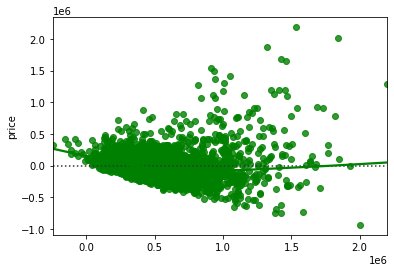

In [80]:
sns.residplot(y_pred, y_test, lowess=True, color="g")

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [84]:
waterfront = df[df['waterfront'] == 1]['price']
no_waterfront = df[df['waterfront'] == 0]['price']

In [85]:
import scipy.stats as scs
t, p = scs.ttest_ind(waterfront, no_waterfront)
p_value = p
p_value

2.465038317654299e-299

In [86]:
waterfront.mean()

1688486.1739130435

In [89]:
no_waterfront.mean()

531505.1133395522

{'whiskers': [<matplotlib.lines.Line2D at 0x7fce685eae50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fce62dbf550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fce685eaaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fce62dbfc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fce62dbff70>],
 'means': []}

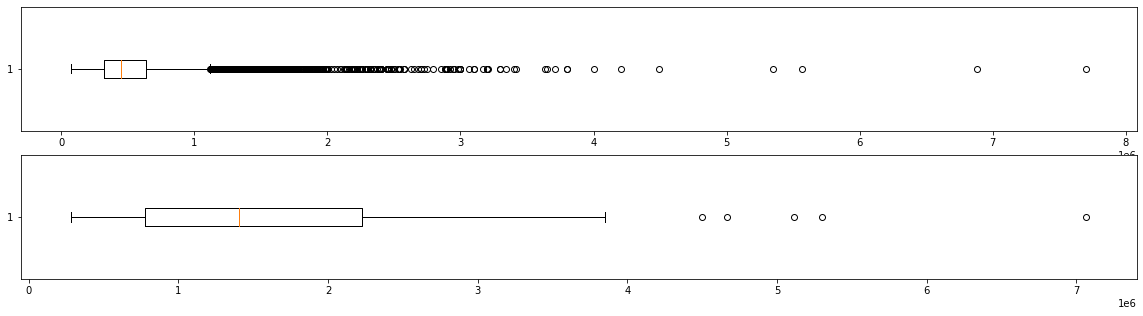

In [115]:
fig, ax = plt.subplots(2,1, figsize = (20, 5))
ax[0].boxplot(no_waterfront, vert = False)
ax[1].boxplot(waterfront, vert = False)

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [ ]:
# your code here

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [ ]:
#your code here

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [ ]:
#your code here 

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [ ]:
# your code here

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [ ]:
# your code here

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [1]:
#your code here 

### 5.2) Fit your scaler to training the data.

In [2]:
#your code here 

### 5.3) Transform the testing set with the scaler.

In [3]:
#your code here 

### 5.4) Fit the model to the training data.

In [4]:
#your code here 

### 5.5) Use the model to predict on the training set and the test set.

In [5]:
#your code here 

### 5.6) Evaluate the training and test predictions using RMSE.

In [6]:
#your code here 

### 5.7) Determine if your model is overfit.

In [ ]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [7]:
# your code here

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [8]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/